In [1]:
import ETL

In [2]:
data = ETL.etl()
data.load_crash_data()

In [3]:
data.pivot_data(
    index_list=['County', 'State'], 
    target_col=['Start_Date'],
    date_interval=['2019-03-01','2020-01-01']
)

TypeError: '>=' not supported between instances of 'datetime.date' and 'str'

In [3]:
import pandas as pd
import umap.umap_ as umap
from hdbscan import HDBSCAN
from plotnine import ggplot, geom_point, geom_line, \
geom_density, aes, stat_smooth, ggtitle, theme_classic, \
xlab, ylab, facet_grid

In [71]:
# how to use plotnine within a function
def plot_embeddings(embeddings, scores): 
    # define dataframe for plotnine
    df = pd.DataFrame({
        'x': embeddings[:,0],
        'y': embeddings[:,1],
        'cluster': scores
    })
    # plot
    p = (
        ggplot(data=df)
        + aes('x', 'y', color='factor(cluster)')
        + geom_point(alpha=0.1)
        + ggtitle('Plot of Embeddings')
        + theme_classic()
    )
    return p

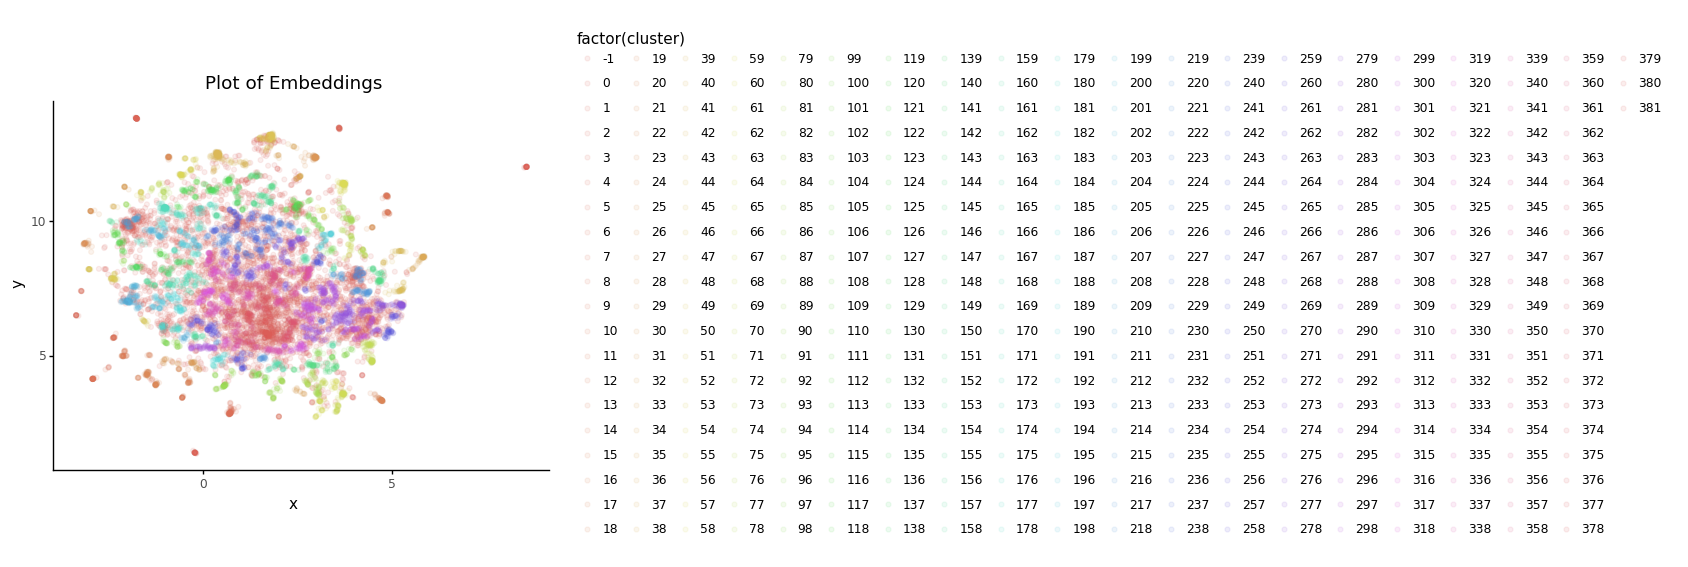

<ggplot: (8741668195637)>

In [72]:
# plot the clusters on the embeddings
# view clustering?
embeddings = p.steps[2][1].embedding_
scores = p.steps[3][1].labels_
plot_embeddings(embeddings, scores)

## Clustering on Description is not incredibly useful

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def tokenize(text):
    stop_words = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
    # tokenize text
    tokens = word_tokenize(text)
    # lemmatize and remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return tokens

pipeline = Pipeline([
    ('vectorize', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('densify', umap.UMAP(random_state=100)),
    ('cluster', HDBSCAN())
])

longer_df = data.crashes_df[0:10000]['Description']
p = pipeline.fit(X=longer_df)